# Basics with Perceptron (P)

* Find this notebook at `EpyNN/nnlive/dummy_Boolean/train.ipynb`.
* Regular python code at `EpyNN/nnlive/dummy_Boolean/train.py`.

In this notebook we will review:

* Handling Boolean data.
* Designing and training a simple perceptron using EpyNN objects.
* Basics and general concepts relevant to the context.

**<font color='red'>This notebook does not enhance, extend or replace EpyNN's documentation.</font>**

**Relevant documentation pages for the current notebook:**

* [Neural Network - Model](https://epynn.net/EpyNN_Model.html)
* [Architecture layers - Model](https://epynn.net/Layer_Model.html)
* [Data - Model](https://epynn.net/Data_Model.html)
* [Data Embedding (Input)](https://epynn.net/Embedding.html)
* [Fully Connected (Dense)](https://epynn.net/Dense.html)

## Import, configure and retrieve data

Follow [this link](prepare_dataset.ipynb) for details about data preparation.

We will import all libraries and configure seeding, behaviors and directory. 

### Imports

In [1]:
# EpyNN/nnlive/dummy_Boolean/train.ipynb
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import epynn.initialize
from epynn.commons.library import (
    configure_directory,
    read_model,
)
from epynn.network.models import EpyNN
from epynn.embedding.models import Embedding
from epynn.dense.models import Dense
from prepare_dataset import prepare_dataset

Note that we imported all libraries we will use, at once and on top of the script. Even though we are going through a notebook, we should pay attention to follow good practices for imports as stated in [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/#imports).

You may have also noted that ``# Related third party imports`` are limited to ``numpy``. 

We developed an educational resource for which computations rely on pure Python/NumPy, nothing else.

### Configuration

Let's now proceed with the configuration and preferences for the current script.

In [2]:
random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')

configure_directory(clear=True)    # This is a dummy example

Remove: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/datasets
Make: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/datasets
Remove: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/models
Make: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/models
Remove: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/plots
Make: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/plots


We already explained the [reason for seeding](prepare_dataset.ipynb#Seeding).

The call to ``np.set_printoptions()`` set the printing behavior of NumPy arrays. To not overfill this notebook, we instructed that beyond ``threshold=10`` NumPy will trigger summarization rather than full representation.

The call to ``np.seterr()`` is **very important** if you want to be aware of what's happening in your Network. Follow the [numpy.seterr](https://numpy.org/doc/stable/reference/generated/numpy.seterr.html) official documentation for details. Herein, we make sure that floating-point errors will always ``warn`` on the terminal session and thus we will always be aware of them.

Finally, the call to ``configure_directory()`` is purely facultative but creates the default EpyNN subdirectories in the working directory.

### Retrieve Boolean features and label 

From [prepare_dataset](prepare_dataset.ipynb#Preparedataset) we imported the function ``prepare_dataset()``.

In [3]:
X_features, Y_label = prepare_dataset(N_SAMPLES=50)

Let's inspect, as always.

In [4]:
for sample in list(zip(X_features, Y_label))[:5]:
    features, label = sample
    print(label, (features.count(True) > features.count(False)), features)

0 False [False, True, False, True, True, False, True, False, True, False, False]
1 True [False, True, False, True, True, False, True, False, True, False, True]
1 True [True, True, False, True, False, True, True, False, False, True, False]
0 False [False, False, False, False, False, False, True, True, False, False, True]
0 False [False, False, False, False, False, True, True, False, True, True, True]


We have what we expect. Remember that the conditional expression is the dummy law we used to assign a label to dummy sample Boolean features.

## Perceptron - Single layer Neural Network

Herein, we are going to build the most simple Neural Network and train it in the most simple way we can.

### The Embedding layer object

In EpyNN, data must be passed as arguments upon call of the ``Embedding()`` layer class constructor.

The instantiated object - the embedding or input layer - is always the first layer in Neural Networks made with EpyNN.

In [5]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      relative_size=(2, 1, 0)) # Training, validation, testing set

The arguments ``X_features`` and ``Y_label`` passed in the class constructor have been split with respect to ``relative_size`` for training, validation and testing sets.

Let’s take a look at what ``relative_size`` means.

In [6]:
dataset = list(zip(X_features, Y_label))   # Pair-wise X-Y data

# We print the 10 first only just to not overfill the notebook
for features, label in dataset[:10]:
    print(features, label)

[False, True, False, True, True, False, True, False, True, False, False] 0
[False, True, False, True, True, False, True, False, True, False, True] 1
[True, True, False, True, False, True, True, False, False, True, False] 1
[False, False, False, False, False, False, True, True, False, False, True] 0
[False, False, False, False, False, True, True, False, True, True, True] 0
[False, False, True, True, False, True, True, True, False, True, True] 1
[True, False, False, True, False, False, True, True, False, True, True] 1
[True, True, False, False, True, False, False, True, False, True, True] 1
[True, False, False, False, False, True, True, True, False, True, True] 1
[True, True, False, True, True, True, True, True, False, False, True] 1


Now, we can apply ``relative_size`` to split the whole dataset into parts.

In [7]:
relative_size=(2, 1, 0)

dtrain_relative, dval_relative, dtest_relative = relative_size

# Compute absolute sizes with respect to full dataset
sum_relative = sum([dtrain_relative, dval_relative, dtest_relative])

dtrain_length = round(dtrain_relative / sum_relative * len(dataset))
dval_length = round(dval_relative / sum_relative * len(dataset))
dtest_length = round(dtest_relative / sum_relative * len(dataset))

# Slice full dataset
dtrain = dataset[:dtrain_length]
dval = dataset[dtrain_length:dtrain_length + dval_length]
dtest = dataset[dtrain_length + dval_length:]

This is the procedure. Let’s see what happened.

In [8]:
print(len(dataset))

print(len(dtrain), dtrain_relative)
print(len(dval), dval_relative)
print(len(dtest), dtest_relative)

50
33 2
17 1
0 0


With ``relative_size=(2, 1, 0)`` we asked to prepare a training set ``dtrain`` two times bigger than the validation set ``dval``.

We have 50 samples.

In [9]:
print(50 / 3 * 2)
print(50 / 3 * 1)

33.333333333333336
16.666666666666668


In [10]:
print(round(50 / 3 * 2))
print(round(50 / 3 * 1))

print((round(50 / 3 * 2)) == len(dtrain))
print((round(50 / 3 * 1)) == len(dval))

33
17
True
True


Note that since we have set ``relative_size=(2, 1, 0)`` the testing set is empty.

Let's explore some properties and attributes of the instantiated ``embedding`` layer object.

In [11]:
# Type of object
print(type(embedding))

# Attributes and values of embedding layer
for i, (attr, value) in enumerate(vars(embedding).items()):
    print(i, attr, value)

<class 'epynn.embedding.models.Embedding'>
0 d {}
1 fs {}
2 p {}
3 fc {}
4 bs {}
5 g {}
6 bc {}
7 o {}
8 activation {}
9 se_hPars None
10 se_dataset {'dtrain_relative': 2, 'dval_relative': 1, 'dtest_relative': 0, 'batch_size': None, 'X_scale': False, 'X_encode': False, 'Y_encode': False}
11 dtrain <epynn.commons.models.dataSet object at 0x7fc07b312160>
12 dval <epynn.commons.models.dataSet object at 0x7fc07b312438>
13 dtest <epynn.commons.models.dataSet object at 0x7fc07b3124a8>
14 dsets [<epynn.commons.models.dataSet object at 0x7fc07b312160>, <epynn.commons.models.dataSet object at 0x7fc07b312438>]
15 trainable False


**Lines 0-9**: Inherited from ``epynn.commons.models.Layer`` which is the [Base Layer](https://epynn.net/Layer_Model.html#base-layer). These instance attributes exist for any layers in EpyNN.

**Lines 10-15**: Instance attributes specific to ``epynn.embedding.models.Embedding`` layer. 

* (10) se_dataset: Contains data-related settings applied upon layer instantiation
* (11-13) dtrain, dval, dtest: Training, validation and testing sets in EpyNN ``dataSet`` object.
* (14) batch_dtrain: Training mini-batches. Contains the data actually used for training.
* (15) dsets: Contains the active datasets that will be evaluated during training. It contains only two ``dataSet`` objects because dval was set to empty.

### The dataSet object

Let's examine one ``dataSet`` object the same way.

In [12]:
# Type of object
print(type(embedding.dtrain))

# Attributes and values of embedding layer
for i, (attr, value) in enumerate(vars(embedding.dtrain).items()):
    print(i, attr, value)

<class 'epynn.commons.models.dataSet'>
0 name dtrain
1 active True
2 X [[False  True False ...  True False False]
 [False  True False ...  True False  True]
 [ True  True False ... False  True False]
 ...
 [ True False False ...  True False False]
 [False False False ...  True False  True]
 [False False  True ...  True False  True]]
3 Y [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
4 y [0 1 1 ... 0 0 0]
5 b {0: 15, 1: 18}
6 ids [ 0  1  2 ... 30 31 32]
7 A []
8 P []


* (0) name: Self-explaining
* (1) active: If it contains data
* (2) X: Set of sample features
* (3) Y: Set of sample label.
* (4) y: Set of single-digit sample label.
* (5) b: Balance of labels in set.
* (6) ids: Sample identifiers.
* (7) A: Output of forward propagation
* (8) P: Label predictions.

For full documentation of the ``epynn.commons.models.dataSet`` object, you can refer to [Data - Model](https://epynn.net/Data_Model.html).

Note that in the present example we use single-digit labels and therefore the only difference between (3) and (4) is the shape. The reason for this apparent duplicate will appear in a subsequent notebook.

In [13]:
print(embedding.dtrain.Y.shape)
print(embedding.dtrain.y.shape)

print(all(embedding.dtrain.Y.flatten() == embedding.dtrain.y))

(33, 1)
(33,)
True


We described how to instantiate the embedding - or input - layer with EpyNN and we browsed the attached attribute-value pairs.

We observed that it contains ``dataSet`` objects and we browsed the corresponding attribute-value pairs for the training set.

We introduced all we needed to know.

We are ready.

For more information about these concepts, please follow this link:

* [Data - Model](https://epynn.net/Data_Model.html)

### The Dense layer object

In [14]:
dense = Dense()    # Defaults to Dense(nodes=1, activation=sigmoid)

This one was easy. Let's inspect.

In [15]:
# Type of object
print(type(dense))

# Attributes and values of dense layer
for i, (attr, value) in enumerate(vars(dense).items()):
    print(i, attr, value)

<class 'epynn.dense.models.Dense'>
0 d {'u': 1}
1 fs {}
2 p {}
3 fc {}
4 bs {}
5 g {}
6 bc {}
7 o {}
8 activation {'activate': 'sigmoid'}
9 se_hPars None
10 activate <function sigmoid at 0x7fc07b3008c8>
11 initialization <function xavier at 0x7fc07b300a60>
12 trainable True


Note that (1) indicates the number of nodes in the Dense layer, and (8, 11) the activation function for this layer. See [Activation - Functions](https://epynn.net/activation.html) for details.

For code, maths and pictures behind layers in general and the dense layer in particular, follow these links:

* [Base layer](https://epynn.net/Layer_Model.html#base-layer)
* [Template layer](https://epynn.net/Layer_Model.html#template-layer)
* [Fully Connected (Dense)](https://epynn.net/Dense.html)

## The EpyNN Network object

### Instantiate your Perceptron

Now that we have an embedding (input) layer and a Dense (output) layer, we can instantiate the EpyNN object which represents the Neural Network.

In [16]:
layers = [embedding, dense]

The list ``layers`` is the architecture of a Perceptron.

In [17]:
model = EpyNN(layers=layers, name='Perceptron_Dense-1-sigmoid')

The object ``EpyNN`` is the Perceptron itself.

Let's prove it.

In [18]:
# Type of object
print(type(model))

# Attributes and values of EpyNN model for a Perceptron
for i, (attr, value) in enumerate(vars(model).items()):
    print(i, attr, value)

<class 'epynn.network.models.EpyNN'>
0 layers [<epynn.embedding.models.Embedding object at 0x7fc07b3123c8>, <epynn.dense.models.Dense object at 0x7fc07b31c0f0>]
1 embedding <epynn.embedding.models.Embedding object at 0x7fc07b3123c8>
2 ts 1631745889
3 uname 1631745889_Perceptron_Dense-1-sigmoid
4 initialized False


Does it really contain the layers we instantiated before?

In [19]:
print((model.embedding == embedding))
print((model.layers[-1] == dense))

True
True


### Perceptron training

It does seem so, yes.

We are going to start the training of this Perceptron with all defaults, the very most simple form.

In [20]:
model.train(epochs=100)

--- EpyNN Check ---                                                                                 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
shape: (33, 11)
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
shape: (33, 1)
Layer: Dense
backward: Dense
shape: (33, 11)
compute_gradients: Dense
Layer: Embedding
backward: Embedding
shape: (33, 11)
compute_gradients: Embedding
--- EpyNN Check OK! ---                                                                             
----------------------- 1631745889_Perceptron_Dense-1-sigmoid -------------------------


-------------------------------- Datasets ------------------------------------

+--------+------+-------+-------+
| dtrain | dval | dtest | batch |
|        |      |       | size  |
+--------+------+-------+-------+
| 33     | 17   | None  | None  |
+--------+------+-------+-------+

+----------+--------+------+-------+
| N_LABELS | dtrain | dval | 

With all defaults, EpyNN returns:

* **EpyNN Check**: Result of a blank epoch to make sure the network is functional. For each layer, output shapes are returned for both the forward and backward propagation.
* **init_logs**: Extended report about datasets, network architecture and shapes.
* **Evaluation**: Real time evaluation of non-empty datasets (may include dtrain, dval, dtest) with default metrics accuracy and default loss function MSE.

See [How to use EpyNN - Console](https://epynn.net/quickstart.html#console) for more details.

You may also like to review the [Loss - Functions](https://epynn.net/loss.html).

For **Evaluation** and to be straightforward, we want:

* Metrics (e.g., accuracy) as high as possible.
* Cost (e.g., MSE) as low as possible.
* Differences in metrics and cost between training and validation data to be **as low as possible**, otherwise we talk about **overfitting**.

**Overfitting** happens when the model corresponds too closely to a particular set of data.

The terminal report indicates:

* Accuracy is 1 or 100% for the training set and 0.824 or 82.4% for the validation set.
* MSE is 0.058 and 0.137 for the training and validation set, respectively.
* Differences between training and validation data are significant but the model could reproduce the validation data with acceptable accuracy. Still, we are in presence of **overfitting**.

In the next notebooks, we will see in practice how to reduce **overfitting**.

Now, we can take the opportunity to define what accuracy means:

In [21]:
Y_train = model.embedding.dval.Y  # True labels (i.e. target values)
A_train = model.embedding.dval.A  # Probabilities - Output of model
P_train = model.embedding.dval.P  # Decision from probabilities

for y, a, p in list(zip(Y_train, A_train, P_train))[:10]:
    print(y, a, p)

[1] [0.88967001] [1.]
[1] [0.62705333] [1.]
[0] [0.43446117] [0.]
[0] [0.28701605] [0.]
[0] [0.74455314] [1.]
[1] [0.85163348] [1.]
[0] [0.25778102] [0.]
[1] [0.9196748] [1.]
[0] [0.0204012] [0.]
[0] [0.76087077] [1.]


This print denotes for each row, by column:

* The true label or target value: It is ``0`` or ``1`` herein.
* The output probability: The value is within \[0, 1\]. Therefore, the higher the probability the more confident the model is to predict a label of ``1``. Conversely, the lower the probability the more confident the model is to predict a label of ``0``.
* The predicted label or output decision: This is the rounding of the output probability to the nearest integer.

When the number of output nodes is equal to one, rounding of the output probability is as follows:

In [22]:
print(all(np.around(A_train) == P_train))

True


Then, the accuracy for each sample is defined as:

In [23]:
print((Y_train == P_train))

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


Note that the accuracy for each sample is `True` or `False` which evaluates to `1` and `0`, respectively.

To compute the accuracy with respect to the whole dataset, we need the mean:

In [24]:
print((Y_train == P_train).mean())
print(np.around((Y_train == P_train).mean(), 3))

0.8235294117647058
0.824


Note the rounded value is, as expected, identical to the accuracy reported for the last epoch on the validation set.

We can finally plot the results:

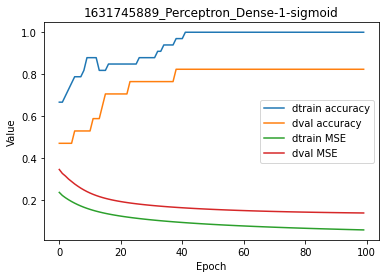

In [25]:
model.plot(path=False)

In this plot, *dtrain* and *dval* refer to the training and validation set and accuracy/MSE values are identical to those printed on the terminal. This is simply a graphical representation of the tabular log report.

For code, maths and pictures behind the EpyNN model, follow this link:

* [Neural Network - Model](https://epynn.net/EpyNN_Model.html)

## Write, read & Predict

A trained model can be written on disk such as:

In [26]:
model.write()

# model.write(path=/your/custom/path)

Make: /media/synthase/beta/EpyNN/nnlive/dummy_Boolean/models/1631745889_Perceptron_Dense-1-sigmoid.pickle


A model can be read from disk such as:

In [27]:
model = read_model()

# model = read_model(path=/your/custom/path)

We can retrieve new features and predict on them.

In [28]:
X_features, _ = prepare_dataset(N_SAMPLES=10)

dset = model.predict(X_features)

Results can be extracted such as:

In [29]:
for n, pred, probs, features in zip(dset.ids, dset.P, dset.A, dset.X):
    print(n, pred, probs, features)
    # pred = output (decision); probs = output (probability)

0 [1.] [0.682108] [ True False False ...  True  True  True]
1 [1.] [0.85091524] [ True  True  True ...  True False  True]
2 [1.] [0.588306] [False  True False ...  True  True  True]
3 [1.] [0.92198789] [False  True  True ... False  True  True]
4 [0.] [0.09389845] [ True False  True ...  True False False]
5 [1.] [0.61437954] [False  True False ...  True  True  True]
6 [1.] [0.90919133] [False False  True ... False  True  True]
7 [1.] [0.82544061] [False False  True ... False  True False]
8 [1.] [0.86470673] [ True False  True ...  True  True  True]
9 [1.] [0.84977889] [ True  True  True ...  True  True  True]
